In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import dexplot as dxp
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv('df_clean.csv')
df.head()

,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
0,Dodge The Cars!,Racing,0.0,52224.0,Everyone,False,False,False,320,320,False
1,Block Fill: Puzzle Game,Puzzle,0.0,16384.0,Everyone,True,True,False,459,400,False
2,Sticky Ball,Arcade,0.0,25600.0,Everyone,True,True,False,1198,1177,False
3,Extrude Balance,Arcade,0.0,26624.0,Everyone,True,True,False,708,45,False
4,Bowling Paradise Pro FREE,Sports,0.0,38912.0,Everyone,True,True,False,2971,2278,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214481 entries, 0 to 214480
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AppName              214481 non-null  object 
 1   Category             214481 non-null  object 
 2   Price                214481 non-null  float64
 3   Size                 214481 non-null  float64
 4   ContentRating        214481 non-null  object 
 5   AdSupported          214481 non-null  bool   
 6   InAppPurchases       214481 non-null  bool   
 7   EditorsChoice        214481 non-null  bool   
 8   AppAge               214481 non-null  int64  
 9   DaysSinceLastUpdate  214481 non-null  int64  
 10  GoodApp              214481 non-null  bool   
dtypes: bool(4), float64(2), int64(2), object(3)
memory usage: 12.3+ MB


# Response Variable: 'GoodApp'

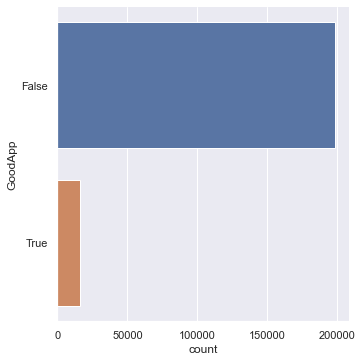

In [4]:
sb.catplot(y = 'GoodApp', data = df, kind = "count")
plt.savefig('goodapp.png', transparent = True)

We can see a very significant class imbalance, which we will definitely need to handle before developing the machine learning models.

# Univariate Exploration

## Numeric Predictors
`'Price', 'Size', 'AppAge', 'DaysSinceLastUpdate'`

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Price,Size,AppAge,DaysSinceLastUpdate
count,214481.00,214481.00,214481.00,214481.00
mean,0.12,34559.32,1171.21,682.46
std,2.36,31288.24,848.06,660.03
min,0.00,1.00,1.00,0.00
25%,0.00,13312.00,450.00,161.00
50%,0.00,26624.00,1006.00,455.00
75%,0.00,47104.00,1732.00,1031.00
max,399.99,1044480.00,4156.00,4081.00


Notes:
- Price is in **USD**, with 0 denoting that it is a free game
- Size is the app size in **kilobytes**
- AppAge is the number of **days** the game has been in the app store, found by taking date the data the scraped minus the date of the app release
- DaysSinceLastUpdate is the number of **days** since the last update was released, from the date the data was scraped

### Price

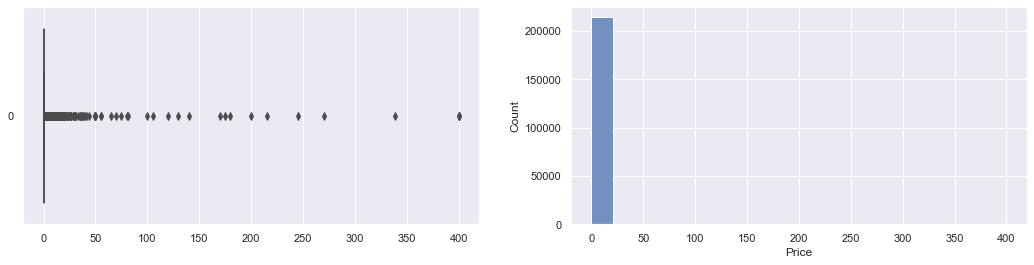

In [6]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = df['Price'], orient = "h", ax = axes[0])
sb.histplot(data = df['Price'], ax = axes[1])
plt.savefig('price.png', transparent = True)

Distribution is very positively skewed, high prices are outliers. The majority of games are free or very cheap.

In [7]:
paid_games = df[df['Price']>0].copy()
paid_games

,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
27,Standalone Golf GPS by Hole19,Sports,4.99,30720.00,Everyone,False,False,False,1589,175,False
60,Theme Park Simulator,Simulation,0.99,36864.00,Everyone,True,True,False,224,130,False
94,Friday - by Friedemann Friese,Board,4.49,71680.00,Everyone,False,False,False,1447,798,False
103,King of Defense Premium: Tower Defense Offline,Strategy,0.99,113664.00,Everyone 10+,True,True,False,349,31,False
150,Teeny Titans - Teen Titans Go!,Strategy,3.99,35840.00,Everyone 10+,True,False,False,1819,439,False
...,...,...,...,...,...,...,...,...,...,...,...
214407,Zombie City Defense,Strategy,1.99,46080.00,Everyone 10+,False,True,False,2501,2337,False
214412,Connect: cute monsters and food. Casual game,Casual,0.99,6860.80,Everyone,True,True,False,582,281,False
214425,SpongeBob Tickler,Casual,0.99,9113.60,Everyone,False,False,False,3766,2786,False
214450,Swift Math Game PRO,Educational,1.99,2560.00,Everyone,False,False,False,1646,872,False


In [8]:
paid_games.describe()[['Price']]

,Price
count,6035.00
mean,4.42
std,13.36
min,0.89
25%,1.49
50%,2.99
75%,4.99
max,399.99


Even among the paid games, games are very cheap. The 75th percentile is only 4.99USD. Developers should consider pricing their games cheaply or free in order to compete well in this market (and earn revenue through other streams)

### Size

<AxesSubplot:xlabel='Size', ylabel='Count'>

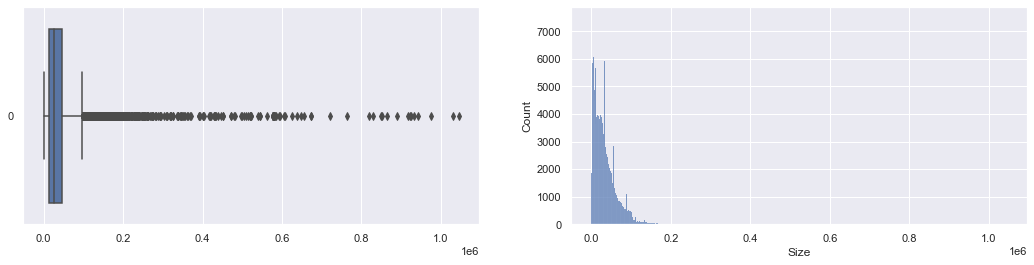

In [9]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = df['Size'], orient = "h", ax = axes[0])
sb.histplot(data = df['Size'], ax = axes[1])

Size is very left skewed as well, large size games are outliers. Developers could consider developing less bulky apps, which makes since for on-the-go mobile gaming. This is especially since mobile games cater to more casual gaming individuals, and not all users have powerful phones.

In [10]:
df[df['Size'] == 1] #curious to see which games have size of 1 KB

,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
45478,Kỳ Nữ Hoàng Cung,Role Playing,0.00,1.00,Everyone 10+,True,False,False,184,47,False
213334,Space Marshals 3,Action,0.00,1.00,Teen,False,True,False,232,6,False


Cannot verify if the size of 1 KB is a mistake or not...

### AppAge

<AxesSubplot:xlabel='AppAge', ylabel='Count'>

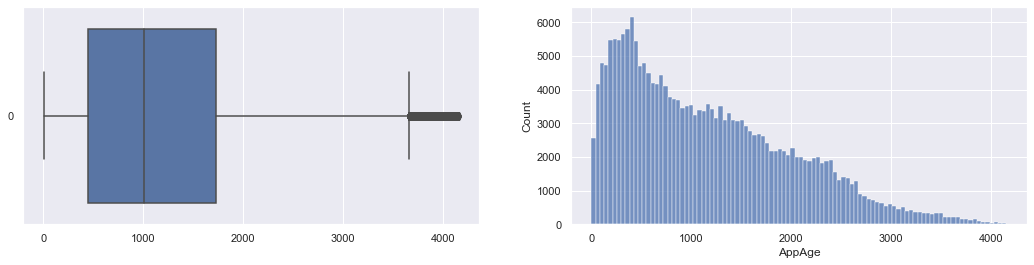

In [11]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = df['AppAge'], orient = "h", ax = axes[0])
sb.histplot(data = df['AppAge'], ax = axes[1])

Also a positive skew distribution which makes sense as an app's age can only ever get longer. Majority of the apps are around 500 days old.

### DaysSinceLastUpdate

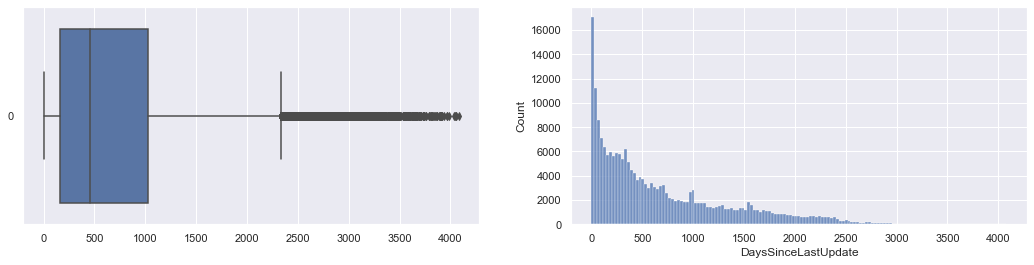

In [12]:
# DaysSinceLastUpdate
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = df['DaysSinceLastUpdate'], orient = "h", ax = axes[0])
sb.histplot(data = df['DaysSinceLastUpdate'], ax = axes[1])
plt.savefig('dayslastupdate.png', transparent = True)

The lower the better, as a more recently updated app is a better app. The distribution is also positive skewed, there are few very out of date apps.

## Categorical Predictors
`'Category', 'ContentRating', 'AdSupported', 'InAppPurchases', 'EditorsChoice'`

### Category

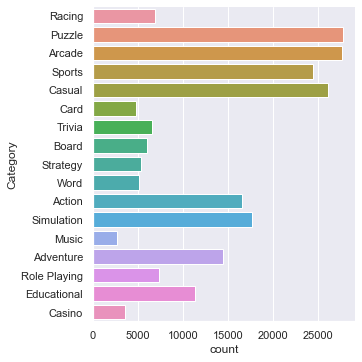

In [13]:
sb.catplot(y = 'Category', data = df, kind = "count")
plt.savefig('category.png', transparent = True)

Most games on the play store are puzzle, arcade, casual, and sports games.

### ContentRating

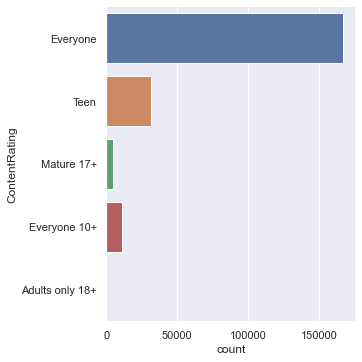

In [14]:
sb.catplot(y = 'ContentRating', data = df, kind = "count")

Most games are developed for everyone.

### AdSupported

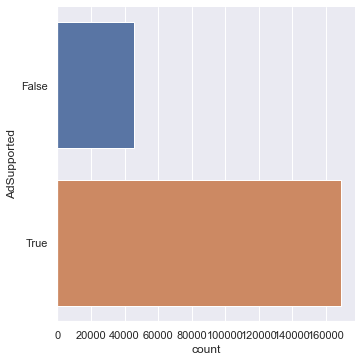

In [15]:
sb.catplot(y = 'AdSupported', data = df, kind = "count")
plt.savefig('adsupported.png', transparent = True)

Most games run ads, seems like that's how most developers earn revenue, rather than charging a price for the app upfront.

### InAppPurchases

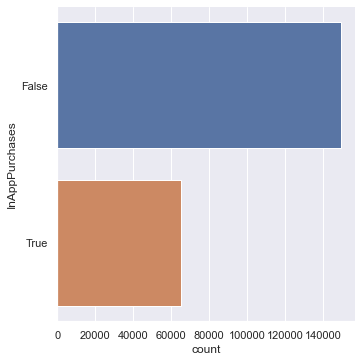

In [16]:
sb.catplot(y = 'InAppPurchases', data = df, kind = "count")
plt.savefig('inapppurchase.png', transparent = True)

Surprisingly, most mobile games do not have in app purchases. Meaning that there are no premium features, or pay-to-win strategies (in app purchases that support the player). Seems like running ads is the most common way developers earn money with their app.

### EditorsChoice

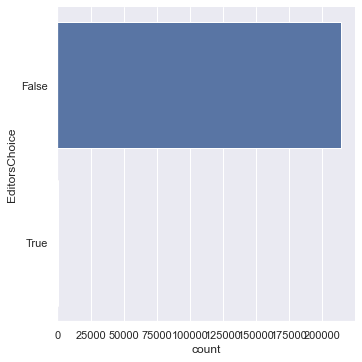

In [17]:
sb.catplot(y = 'EditorsChoice', data = df, kind = "count")
plt.savefig('editorschoice.png', transparent = True)

Only very few games are editors choice, which we expect as it is a coveted title. Let's view these apps below.

In [18]:
df[df['EditorsChoice'] == True]

,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
110,Hexonia,Strategy,0.00,84992.00,Teen,True,True,True,870,134,True
549,Cyber Hunter,Adventure,0.00,103424.00,Teen,False,True,True,785,18,True
1258,FRAMED 2,Puzzle,4.99,24576.00,Teen,False,False,True,1399,705,False
3483,Animal Restaurant,Simulation,0.00,125952.00,Everyone,True,True,True,643,4,True
5051,Dawn of Titans: War Strategy RPG,Strategy,0.00,34816.00,Teen,False,True,True,1651,76,True
...,...,...,...,...,...,...,...,...,...,...,...
212879,eFootball PES 2021,Sports,0.00,97280.00,Everyone,True,True,True,1485,7,True
213446,Zen Koi,Casual,0.00,65536.00,Everyone,True,True,True,2247,26,True
213909,SUMI SUMI : Matching Puzzle,Puzzle,0.00,94208.00,Everyone,True,True,True,1043,2,True
213994,Auto Chess,Strategy,0.00,99328.00,Everyone 10+,True,True,True,747,0,True


# Bivariate Exploration: Relationship with 'GoodApp'

## Numeric Predictors
`'Price', 'Size', 'AppAge', 'DaysSinceLastUpdate'`

### Price vs GoodApp

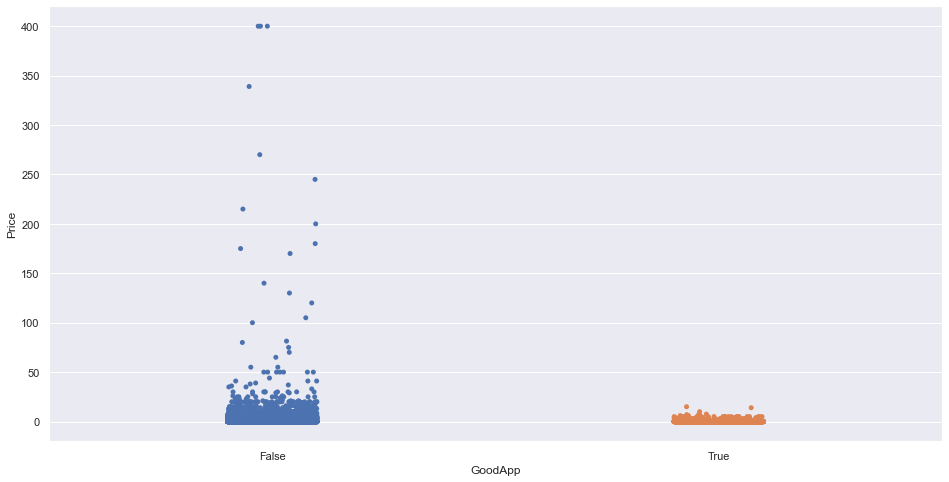

In [19]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'GoodApp', y = 'Price', data = df)
plt.savefig('pricevapp.png', transparent = True)

Good apps tend to not have high prices.

### Size vs GoodApp

<AxesSubplot:xlabel='GoodApp', ylabel='Size'>

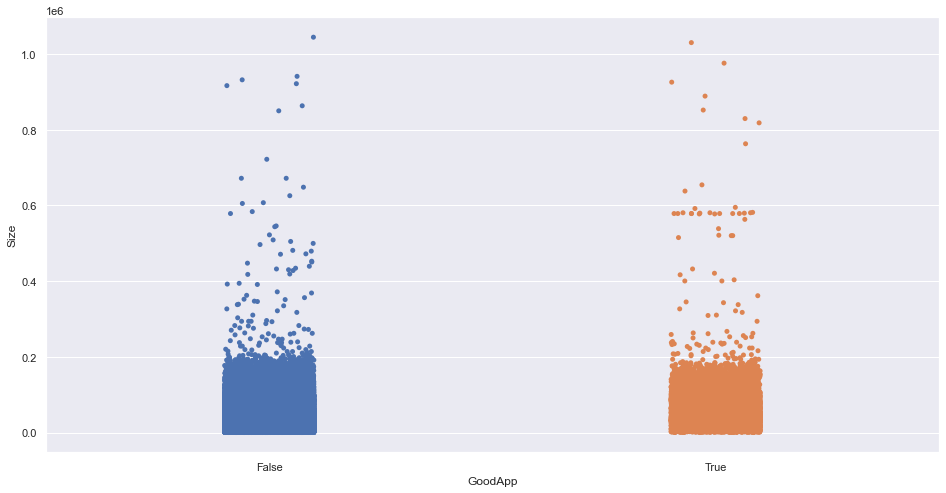

In [20]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'GoodApp', y = 'Size', data = df)

Can't see a clear relationship, size may not be a good predictor of whether an app is good or not.

### AppAge vs GoodApp

<AxesSubplot:xlabel='GoodApp', ylabel='AppAge'>

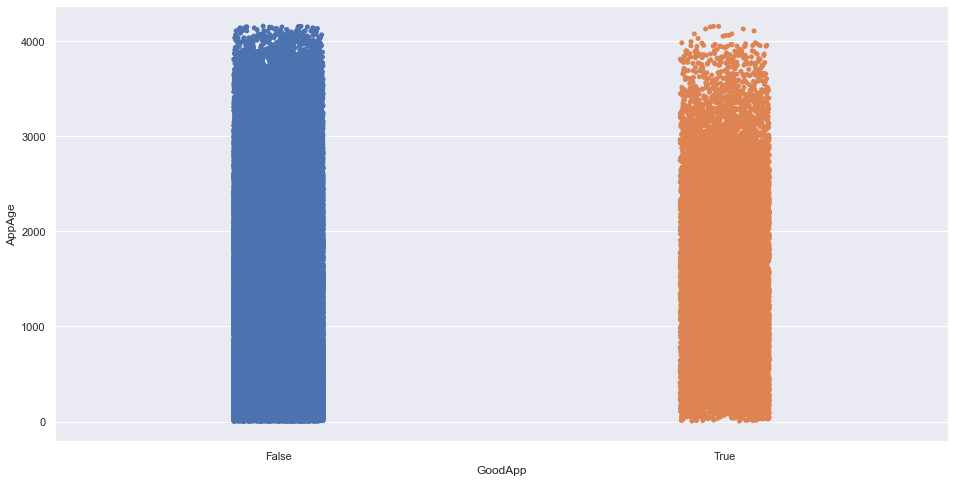

In [21]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'GoodApp', y = 'AppAge', data = df)

Can't see a clear relationship. Only the really old games tend to not be good apps.

### DaysSinceLastUpdate vs GoodApp

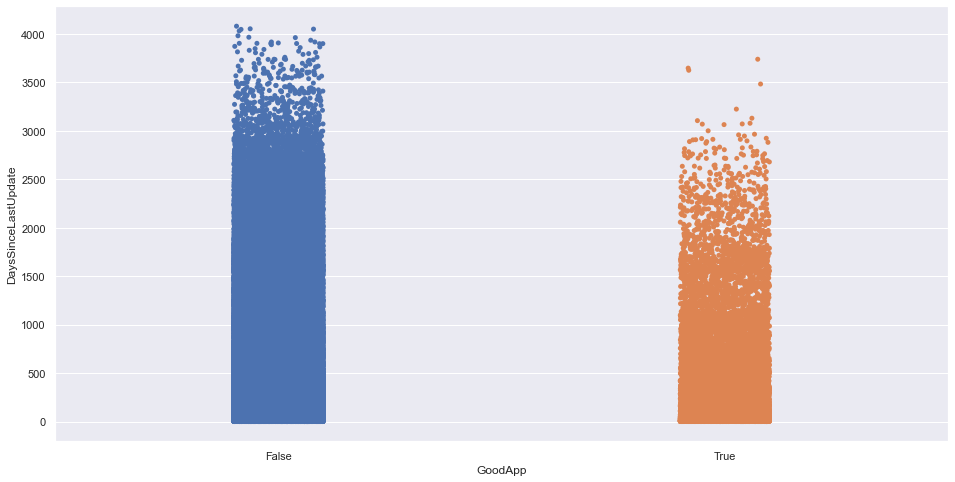

In [22]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'GoodApp', y = 'DaysSinceLastUpdate', data = df)
plt.savefig('dayslastupdatevapp.png', transparent = True)

Good apps tend to be more up-to-date, very out-of-date apps tend to not be good apps. However, the very up-to-date apps are not guaranteed to be good apps, it could be that they were newly released games.

## Categorical Predictors
`'Category', 'ContentRating', 'AdSupported', 'InAppPurchases', 'EditorsChoice'`

*Note*: The numbers represent the percentage number of apps in a particular cell

### Category vs GoodApp

<AxesSubplot:xlabel='Category', ylabel='GoodApp'>

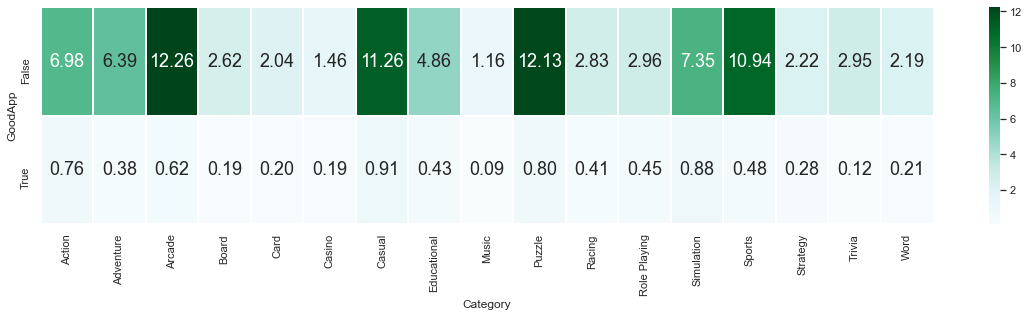

In [23]:
f = plt.figure(figsize=(20, 4))
sb.heatmap((df.groupby(['GoodApp', 'Category']).size().unstack())/len(df)*100, #percentage apps
           linewidths = 1, annot = True, fmt = '.2f', annot_kws = {"size": 18}, cmap = "BuGn")

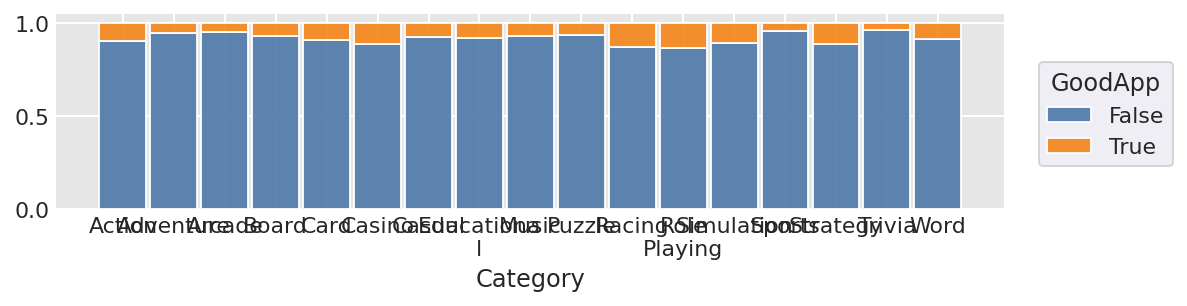

In [34]:
dxp.count('Category', data = df, split = 'GoodApp', stacked = True, normalize='Category')

### ContentRating vs GoodApp

<AxesSubplot:xlabel='ContentRating', ylabel='GoodApp'>

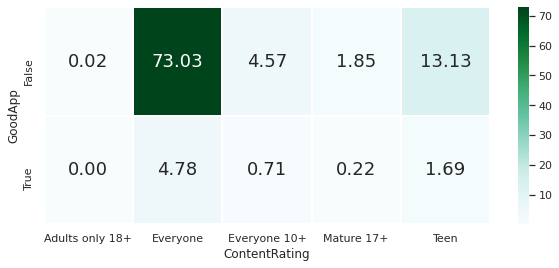

In [33]:
f = plt.figure(figsize=(10, 4))
sb.heatmap((df.groupby(['GoodApp', 'ContentRating']).size().unstack())/len(df)*100, #percentage apps
           linewidths = 1, annot = True, fmt = '.2f', annot_kws = {"size": 18}, cmap = "BuGn")

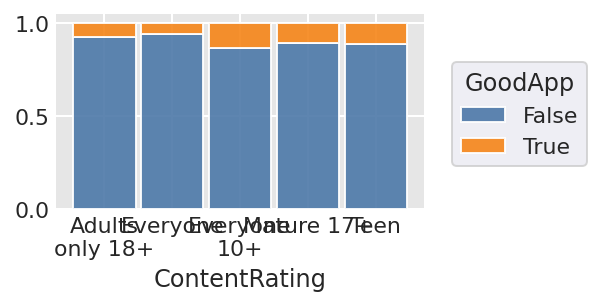

In [26]:
dxp.count('ContentRating', data = df, split = 'GoodApp', stacked = True, normalize='ContentRating')

### AdSupported vs GoodApp

<AxesSubplot:xlabel='AdSupported', ylabel='GoodApp'>

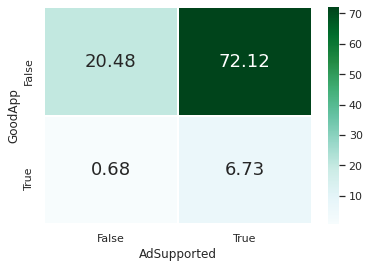

In [27]:
f = plt.figure(figsize=(6, 4))
sb.heatmap((df.groupby(['GoodApp', 'AdSupported']).size().unstack())/len(df)*100, #percentage apps
           linewidths = 1, annot = True, fmt = '.2f', annot_kws = {"size": 18}, cmap = "BuGn")

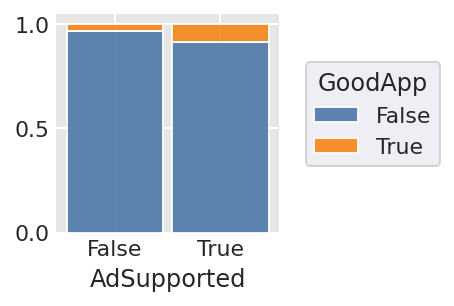

In [28]:
dxp.count('AdSupported', data = df, split = 'GoodApp', stacked = True, normalize='AdSupported')

### InAppPurchases vs GoodApp

<AxesSubplot:xlabel='InAppPurchases', ylabel='GoodApp'>

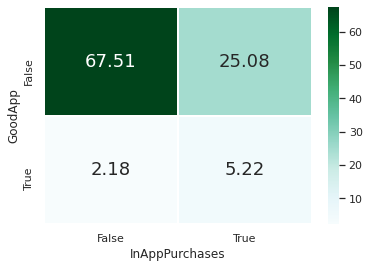

In [29]:
f = plt.figure(figsize=(6, 4))
sb.heatmap((df.groupby(['GoodApp', 'InAppPurchases']).size().unstack())/len(df)*100, #percentage apps
           linewidths = 1, annot = True, fmt = '.2f', annot_kws = {"size": 18}, cmap = "BuGn")

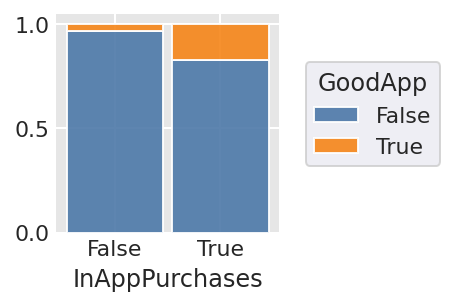

In [30]:
dxp.count('InAppPurchases', data = df, split = 'GoodApp', stacked = True, normalize='InAppPurchases')

### EditorsChoice vs GoodApp

<AxesSubplot:xlabel='EditorsChoice', ylabel='GoodApp'>

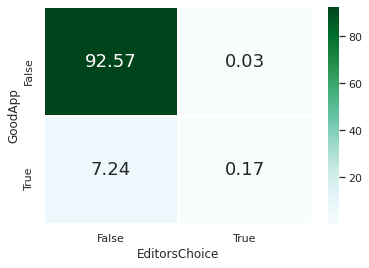

In [31]:
f = plt.figure(figsize=(6, 4))
sb.heatmap((df.groupby(['GoodApp', 'EditorsChoice']).size().unstack())/len(df)*100, #percentage apps
           linewidths = 1, annot = True, fmt = '.2f', annot_kws = {"size": 18}, cmap = "BuGn")

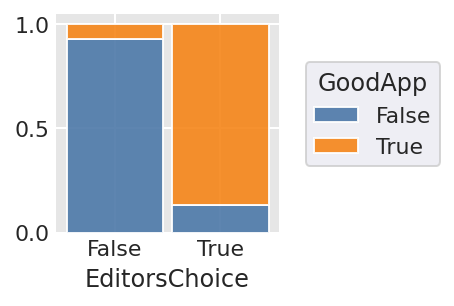

In [32]:
dxp.count('EditorsChoice', data = df, split = 'GoodApp', stacked = True, normalize='EditorsChoice')